## Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns

## Importing test and train data

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [4]:
test.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,74051,I,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
1,74052,I,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
2,74053,F,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
3,74054,F,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
4,74055,I,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066


## Analysing Train data

In [5]:
train.shape

(74051, 10)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  object 
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.6+ MB


In [7]:
train.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

##### There are no null values in dataset

In [8]:
train.describe()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
mean,37025.000000,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870,9.967806
std,21376.826729,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372,3.175189
min,0.000000,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,18512.500000,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930,8.000000
50%,37025.000000,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453,10.000000
75%,55537.500000,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840,11.000000
max,74050.000000,2.012815,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


##### Minimum age :1 Maximum age :29

## Labelling 'Sex' column 

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train['Sex']=le.fit_transform(train['Sex'])

In [10]:
train.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,1,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,0,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,1,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


##### Sex (after encoding):
##### F : 0
##### I : 1
##### M : 2


## Graphical representation

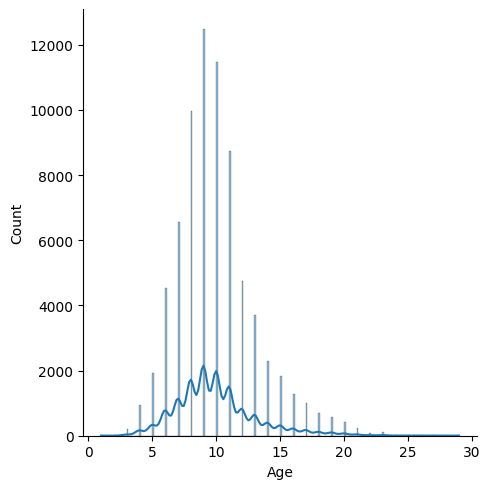

In [11]:
sns.displot(x='Age',data=train,kde=True)

##### So Age represents Normal Distribution i.e. there are no outliers

<AxesSubplot:>

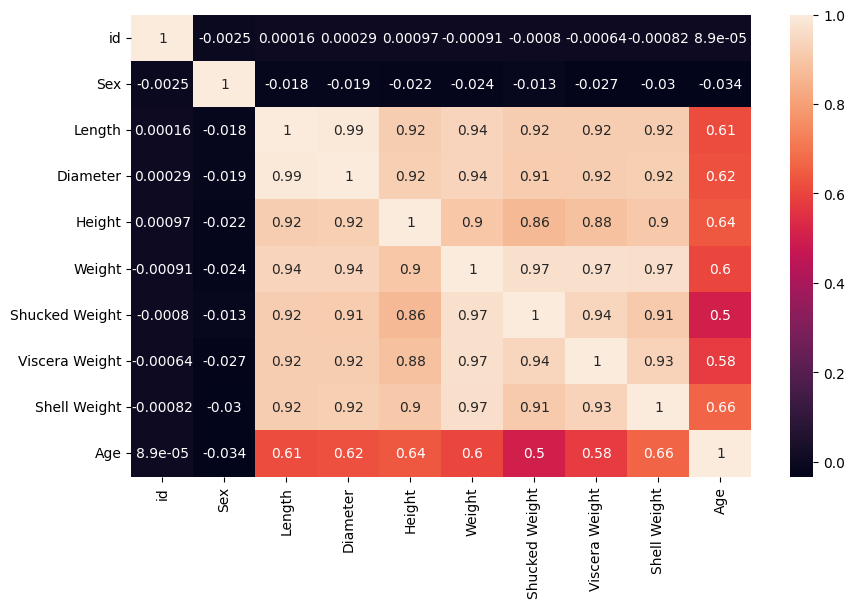

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(train.corr(),annot=True)

##### Ignoring 'id' column we can see tha 'sex' is having least or no effect on age column so we can neglect it

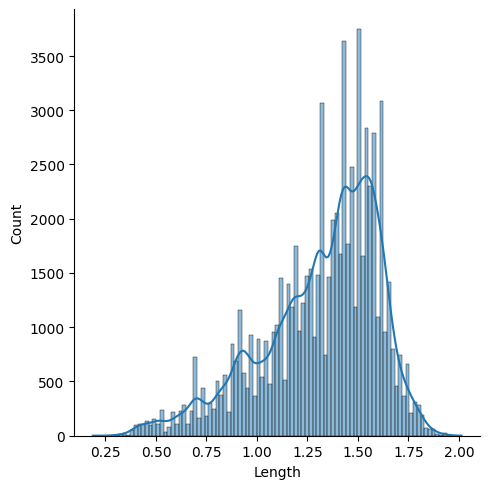

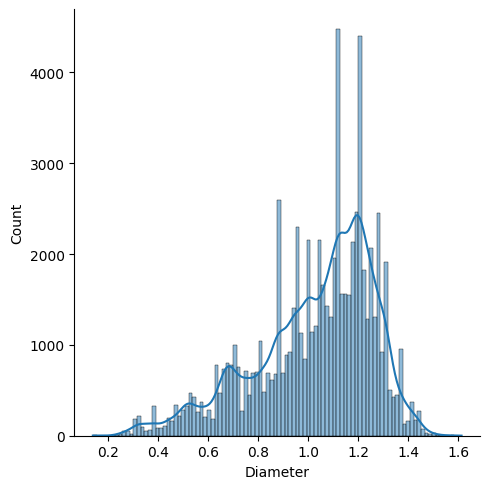

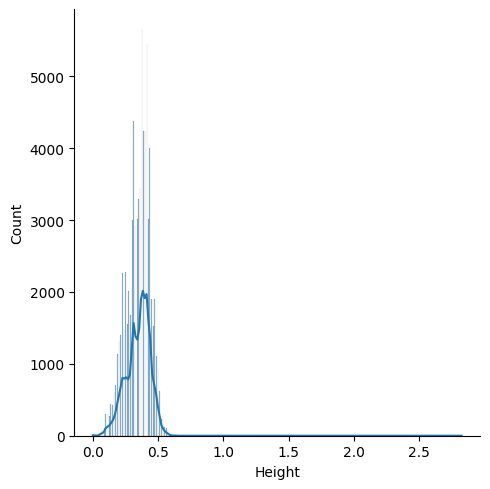

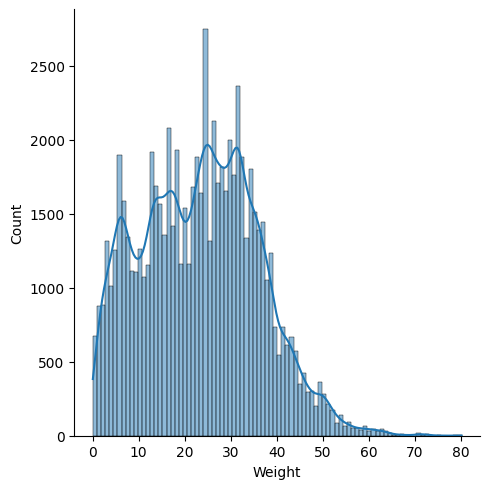

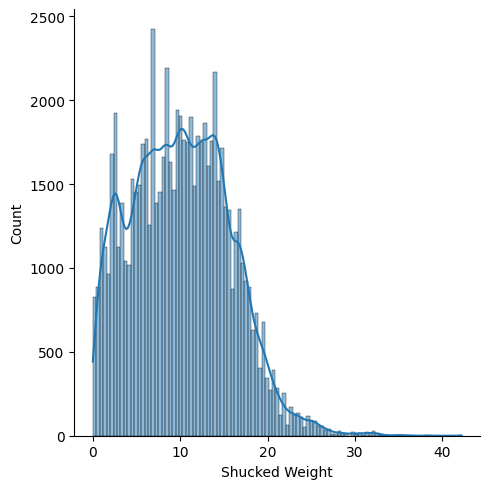

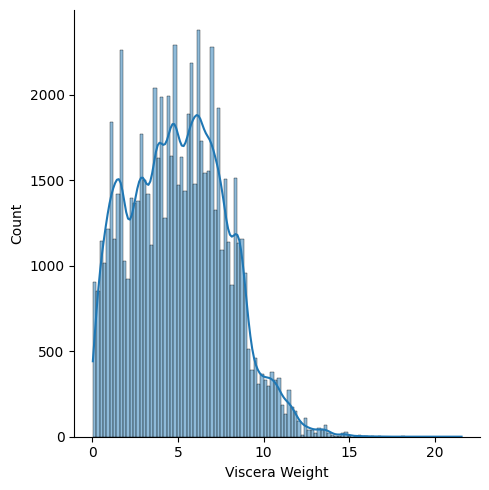

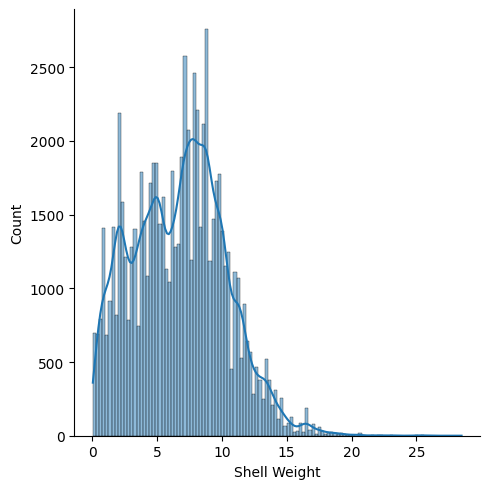

In [13]:
features=['Length','Diameter','Height','Weight','Shucked Weight','Viscera Weight','Shell Weight']
for i in features:
    sns.displot(x=i,data=train,kde=True)
    

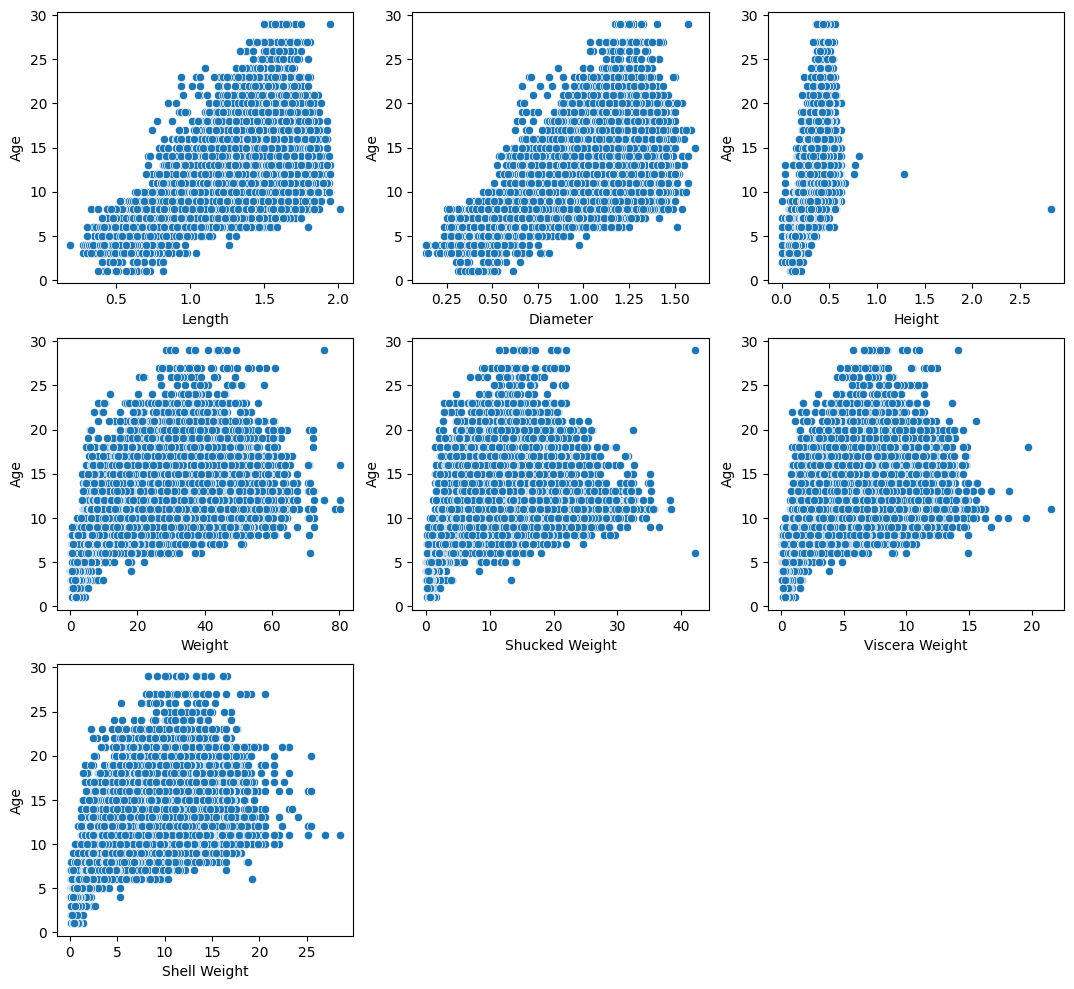

In [14]:
features=['Length','Diameter','Height','Weight','Shucked Weight','Viscera Weight','Shell Weight']
l=list(enumerate(features))

plt.figure(figsize=(13,12))
for i in l:
    plt.subplot(3,3,i[0]+1)
    sns.scatterplot(x=i[1],y='Age',data=train)

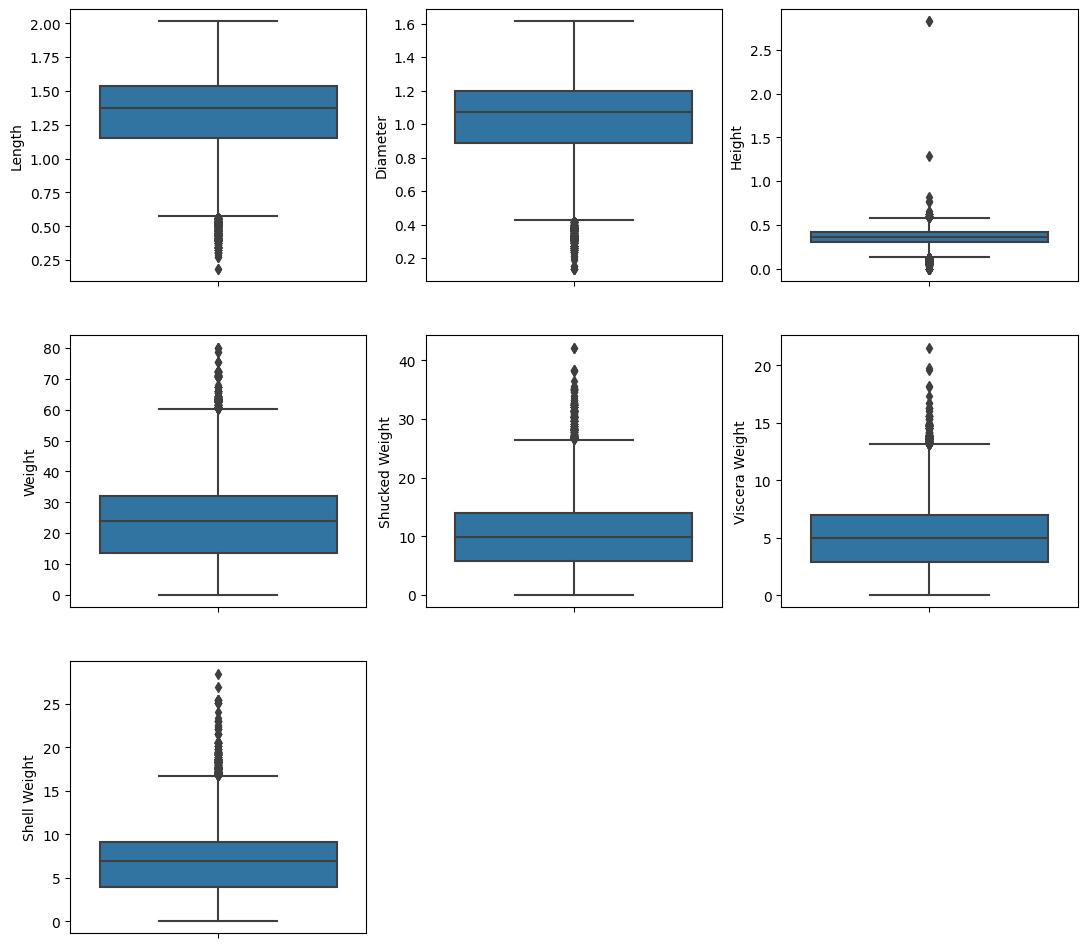

In [15]:
plt.figure(figsize=(13,12))
for i in l:
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(y=i[1],data=train)

##### By these plots we can see there are lot of outliers in features 'Viscera Weight','Shucked Weight','Shell Weight' and some in other
##### lets fix these

(74051, 8)

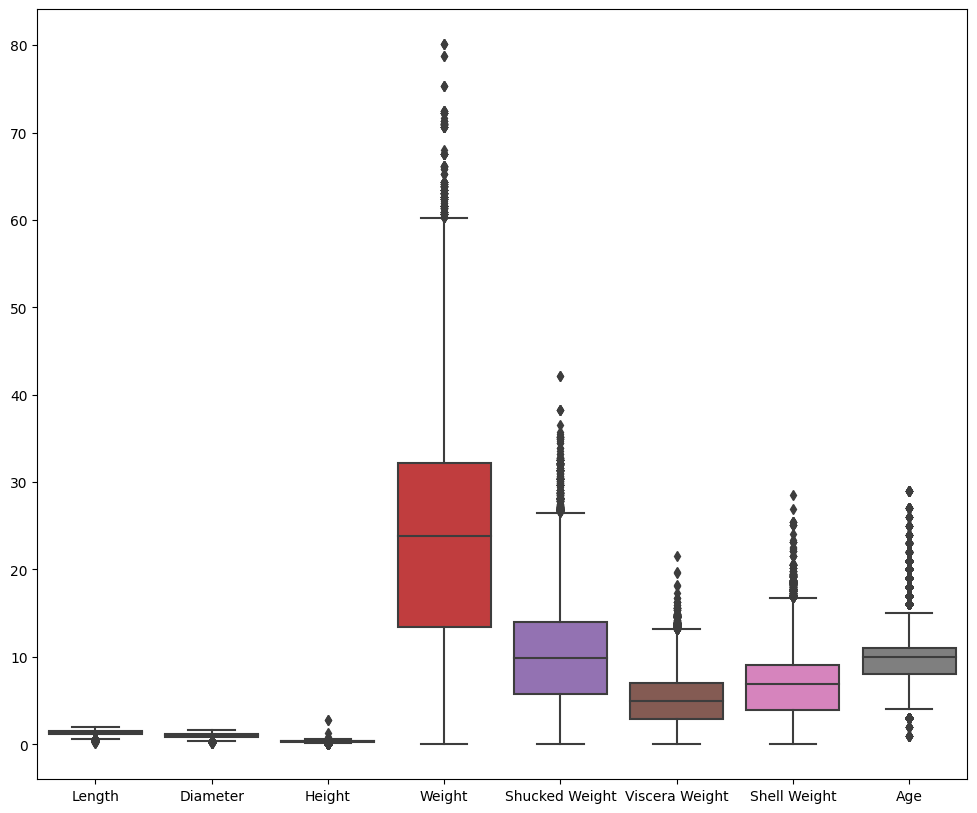

In [16]:
copy=train.drop(['id','Sex'],axis=1)
plt.figure(figsize=(12,10))
sns.boxplot(data=copy)
copy.shape

In [17]:
q=train['Shucked Weight'].quantile(.97)
train=train[train['Shucked Weight']<q]
train.shape

(71756, 10)

<AxesSubplot:>

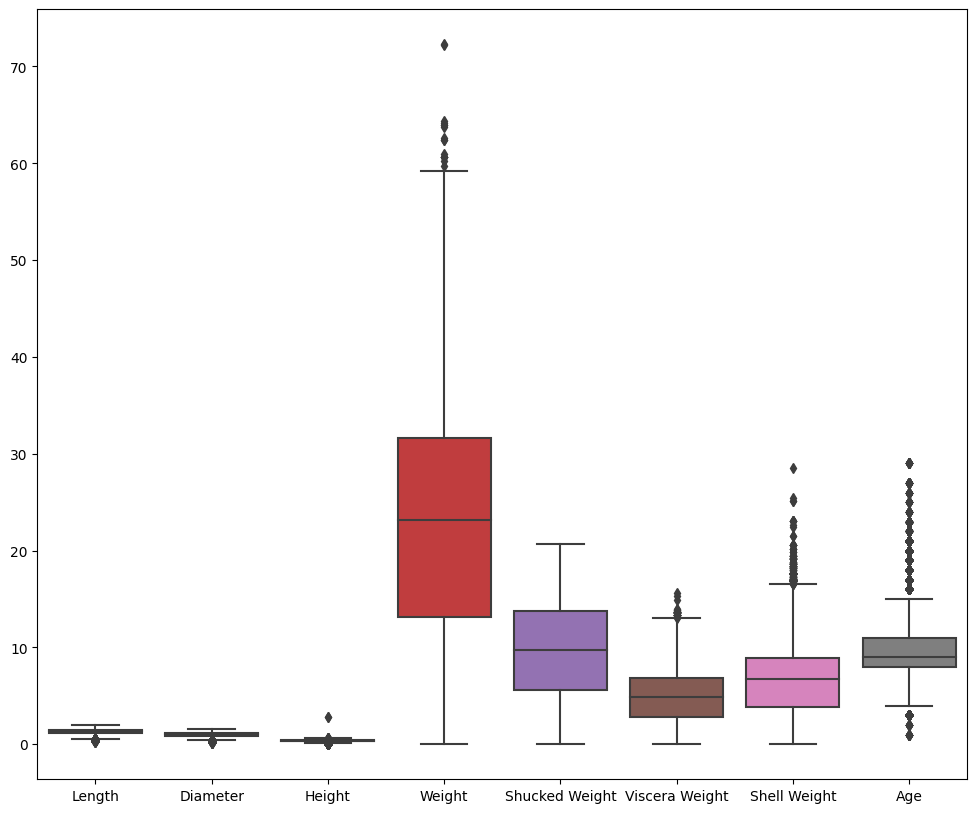

In [18]:
copy=train.drop(['id','Sex'],axis=1)
plt.figure(figsize=(12,10))
sns.boxplot(data=copy)


##### Now we can see we have reduced outliers in shucked weight to 0 and also from other feature.
##### Why we chose Shucked Weight?
##### because Shucked Weight has the most effect on age acc to heatmap, and its the most imp feature 

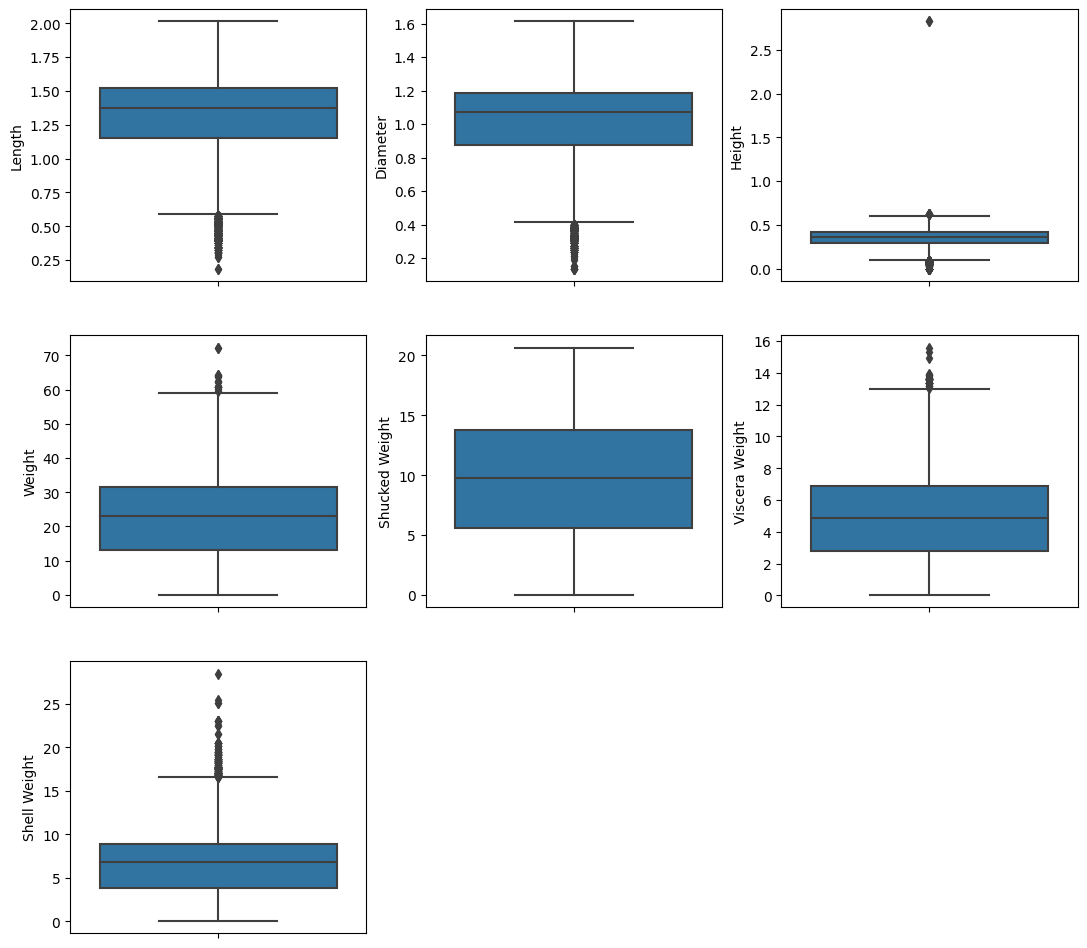

In [19]:
plt.figure(figsize=(13,12))
for i in l:
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(y=i[1],data=train)

Now we have less outliers

##### We can do the same for shell weight column

In [20]:
q=train['Shell Weight'].quantile(.97)
train=train[train['Shell Weight']<q]
train.shape

(69484, 10)

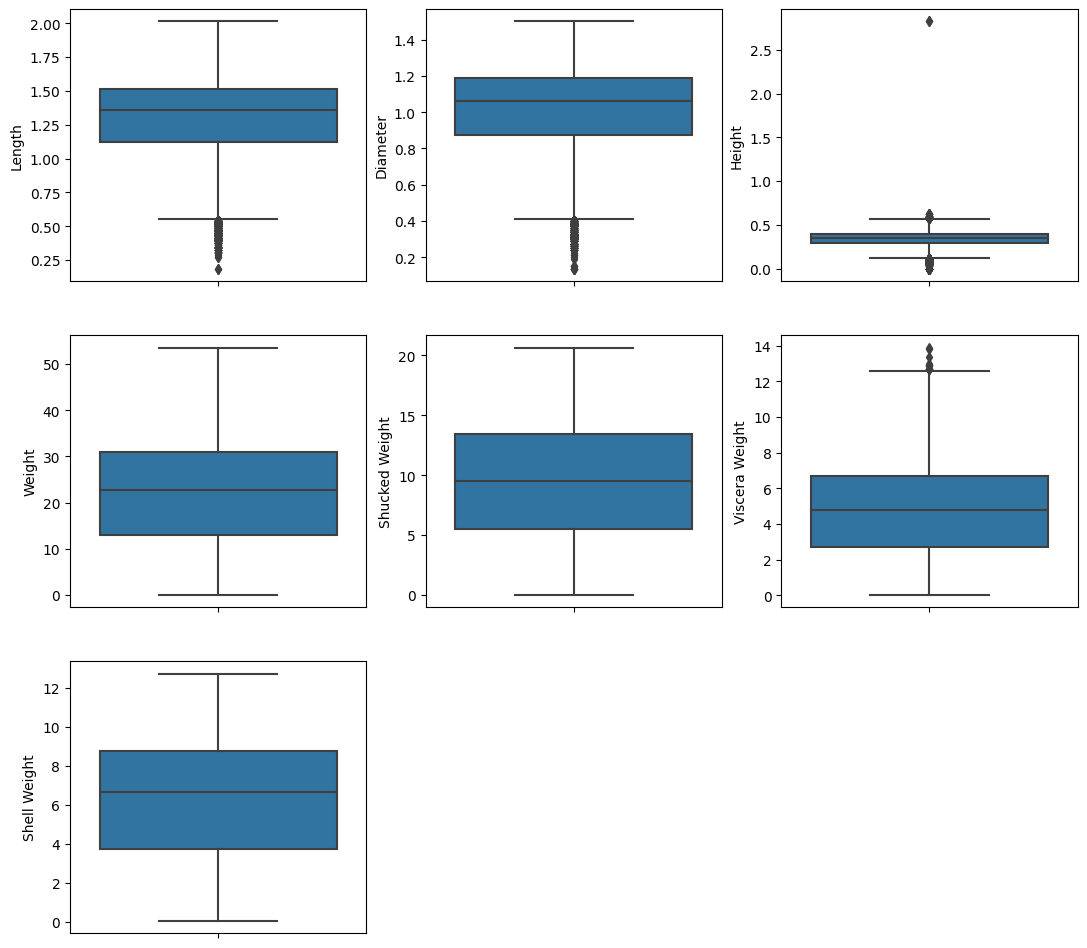

In [21]:
plt.figure(figsize=(13,12))
for i in l:
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(y=i[1],data=train)

##### Now outliers have been removed by a significant amount

## Let's train and test model now

In [22]:
train.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,1,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
4,4,1,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8
5,5,2,1.5000,1.1750,0.4125,28.845616,13.409313,6.789705,7.937860,10


In [23]:
test.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,74051,I,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
1,74052,I,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
2,74053,F,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
3,74054,F,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
4,74055,I,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066


In [24]:
x=train.drop(['id','Sex','Age'],axis=1)
y=train['Age']
x_final=test.drop(['id','Sex'],axis=1)

In [25]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=1)

## MODEL SELECTION

In [27]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


lr=LinearRegression()
kn=KNeighborsRegressor()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor(random_state=1)

mae_scores=[]

In [28]:
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
name='Linear Regression'
mae=mean_absolute_error(y_test,y_pred)
mae_scores.append((name,mae))

In [29]:
kn.fit(x_train,y_train)
y_pred=kn.predict(x_test)
name='KNeighbors Regressor'
mae=mean_absolute_error(y_test,y_pred)
mae_scores.append((name,mae))

In [30]:
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
name='Decision Tree'
mae=mean_absolute_error(y_test,y_pred)
mae_scores.append((name,mae))

In [31]:
rf.fit(x_train,y_train)
y_pred=dt.predict(x_test)
name='Random Forest Regressor'
mae=mean_absolute_error(y_test,y_pred)
mae_scores.append((name,mae))

In [32]:
mae_scores

[('Linear Regression', 1.4591602289698837),
 ('KNeighbors Regressor', 1.5248812778817098),
 ('Decision Tree', 1.9565405094258166),
 ('Random Forest Regressor', 1.9565405094258166)]

In [33]:
mae_df=pd.DataFrame(columns=['Model Name','MAE'])
for name,mae in mae_scores:
    mae_df=mae_df.append({
        'Model Name':name,
        'MAE':mae
    },ignore_index=True)
    
mae_df.sort_values(by='MAE',ascending=True)

,Model Name,MAE
0,Linear Regression,1.459160
1,KNeighbors Regressor,1.524881
2,Decision Tree,1.956541
3,Random Forest Regressor,1.956541


### Best Model: Linear Regression as it has a MAE score of 1.45

In [34]:
pred=lr.predict(x_final)

In [35]:
id=test['id']
output=pd.DataFrame({'id':id,'Age':pred})

In [36]:
output.to_csv('Submission.csv',index=False)

In [37]:
output

,id,Age
0,74051,8.024116
1,74052,8.020968
2,74053,9.909344
3,74054,9.232223
4,74055,7.756578
...,...,...
49363,123414,8.692113
49364,123415,8.194080
49365,123416,12.348102
49366,123417,9.479189


## Let's Check Feature Importance

In [38]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(x_train,y_train)

ExtraTreesClassifier()

In [39]:
col=[ 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight',
       'Shell Weight']
feature_imp=pd.Series(model.feature_importances_,index=col)
feature_imp.sort_values(ascending=True)

Height            0.108844
Diameter          0.123151
Length            0.131147
Shell Weight      0.150615
Viscera Weight    0.157062
Shucked Weight    0.162792
Weight            0.166389
dtype: float64

<AxesSubplot:>

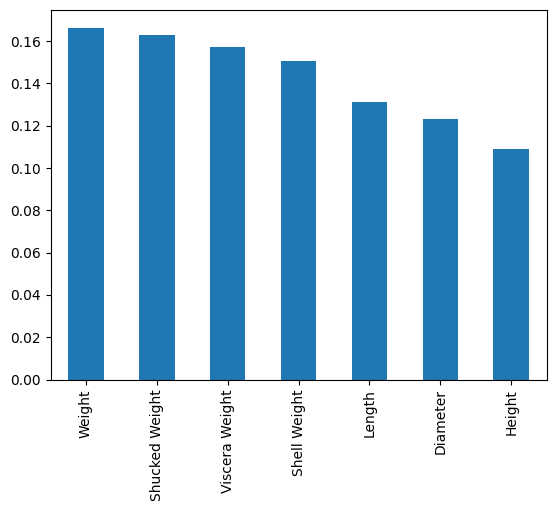

In [40]:
feature_imp.sort_values(ascending=False).plot(kind='bar')